202007D nociliates bloom timing

In [1]:
import datetime as dt
import glob
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
from pathlib import Path
import xarray as xr

from salishsea_tools import places

%matplotlib inline

In [2]:
drop_vars = [
    "time_centered",
    "time_centered_bounds",
    "time_counter_bounds",
    "nav_lat",
    "bounds_lat",
    "nav_lon",
    "bounds_lon",
    "area",
    "deptht_bounds",
]
chunks = {
    "time_counter": 1,
    "deptht": 1,
}

In [3]:
def prep_timeseries(dir_path, file_pattern, n_days): 
    ds_files = sorted(dir_path.glob(file_pattern))
    ds = xr.open_mfdataset(
        ds_files[:n_days],
        chunks=chunks,
        drop_variables=drop_vars,
    )
    timeseries = ds.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
    
    return timeseries

In [4]:
def get_the_data(dir_path, year, numberdays):
    evenlessink = []
    for filename in sorted(dir_path.glob(f"SalishSea_1d_{year}0[23]*ptrc_T*.nc"))[:numberdays]:
        data = xr.load_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
  
    timeseries = xr.concat(evenlessink, dim='time_counter')
    return timeseries

In [5]:
def get_the_data_numpy(dir_path, year):
    timeseries = {'diatoms': np.zeros(61),
                 'nitrate': np.zeros(61)}
    for it, filename in enumerate(sorted(dir_path.glob(f"SalishSea_1d_{year}0[23]*ptrc_T*.nc"))):
        data = xr.open_dataset(filename)
        timeseries['diatoms'][it] = data['diatoms'].isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )[0]
        timeseries['nitrate'][it] = data['nitrate'].isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )[0]
        data.close()

    return timeseries

In [6]:
def get_the_data_nc(dir_path, year):
    timeseries = {'diatoms': np.zeros(61),
                 'nitrate': np.zeros(61)}
    for it, filename in enumerate(sorted(dir_path.glob(f"SalishSea_1d_{year}0[23]*ptrc_T*.nc"))):
        data = xr.open_dataset(filename)
        timeseries['diatoms'][it] = data['diatoms'][0, 1, places.PLACES['S3']['NEMO grid ji'][0], 
                             places.PLACES['S3']['NEMO grid ji'][1]]
        timeseries['nitrate'][it] = data['nitrate'][0, 1, places.PLACES['S3']['NEMO grid ji'][0], 
                             places.PLACES['S3']['NEMO grid ji'][1]]
        data.close()

    return timeseries

In [7]:
def get_sockeye_data(year):
    evenlessink = []
    thestring = f'/data/sallen/results/MEOPAR/202007/{directory}/SalishSea_1d_*ptrc_T*{year}02*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()
    thestring = f'/data/sallen/results/MEOPAR/202007/{directory}/SalishSea_1d_*ptrc_T*{year}03*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()    

    timeseries = xr.concat(evenlessink, dim='time_counter')
    return timeseries

In [8]:
def get_the_data_H201812(year):
    evenlessink = []
    thestring = f'/results/SalishSea/nowcast-green.201812/*/SalishSea_1d_{year}02*ptrc_T*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()
    thestring = f'/results/SalishSea/nowcast-green.201812/*/SalishSea_1d_{year}03*ptrc_T*.nc'
    for filename in sorted(glob.glob(thestring)):
        data = xr.open_dataset(filename)
        data_extract = data.isel(deptht = 1, y = places.PLACES['S3']['NEMO grid ji'][0], 
                             x = places.PLACES['S3']['NEMO grid ji'][1] )
        evenlessink.append(data_extract)
        data.close()    

    timeseries = xr.concat(evenlessink, dim='time_counter')
    return timeseries

In [9]:
directory = '202007D-nociliates'
dir_path = Path(f"/data/sallen/results/MEOPAR/202007/{directory}")
year = 2015
months_regex = '0[23]'
file_pattern = f"SalishSea_1d_{year}{months_regex}*ptrc_T*.nc"
timeseries2015 = prep_timeseries(dir_path, file_pattern, -1)

In [10]:
timeseries2015.load(scheduler='processes', num_workers=4)

<xarray.Dataset>
Dimensions:                       (time_counter: 58)
Coordinates:
    deptht                        float32 1.5
  * time_counter                  (time_counter) datetime64[ns] 2015-02-01T12...
Data variables:
    nitrate                       (time_counter) float32 19.57 19.76 ... 8.574
    ammonium                      (time_counter) float32 0.9335 0.9216 ... 1.149
    silicon                       (time_counter) float32 46.85 46.78 ... 20.74
    diatoms                       (time_counter) float32 0.1361 0.1341 ... 4.955
    flagellates                   (time_counter) float32 0.5619 ... 0.1103
    ciliates                      (time_counter) float32 4.617e-08 ... 1.822e-05
    microzooplankton              (time_counter) float32 0.5039 ... 0.9198
    dissolved_organic_nitrogen    (time_counter) float32 0.4682 0.4658 ... 2.28
    particulate_organic_nitrogen  (time_counter) float32 0.01801 ... 0.2087
    biogenic_silicon              (time_counter) float32 0.004762 ... 0.3212
    mesozooplankton               (time_counter) float32 0.78 0.7675 ... 2.003
Attributes:
    name:         SalishSea_1d_20150201_20150205
    description:  biogeochemical variables
    title:        biogeochemical variables
    Conventions:  CF-1.6
    timeStamp:    2021-Jan-27 08:10:43 GMT
    uuid:         f09f8231-cae3-45a6-bfb8-7c4d98508138

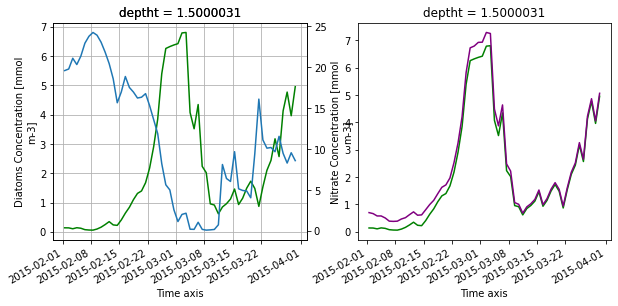

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
timeseries2015.diatoms.plot(ax=axs[0], color='g')
ax2 = axs[0].twinx()
timeseries2015.nitrate.plot(ax=ax2);
axs[0].grid()
timeseries2015.diatoms.plot(ax=axs[1], color='g')
(timeseries2015.diatoms+timeseries2015.flagellates+timeseries2015.ciliates).plot(ax=axs[1], color='purple');

In [15]:
print(timeseries2015.diatoms[28:38])
print(timeseries2015.time_counter[36])

<xarray.DataArray 'diatoms' (time_counter: 10)>
array([6.423953 , 6.7904897, 6.8066187, 4.073668 , 3.5183425, 4.345425 ,
       2.2343621, 2.0184424, 0.955363 , 0.914148 ], dtype=float32)
Coordinates:
    deptht        float32 1.5
  * time_counter  (time_counter) datetime64[ns] 2015-03-01T12:00:00 ... 2015-...
Attributes:
    standard_name:       mole_concentration_of_diatoms_expressed_as_nitrogen_...
    long_name:           Diatoms Concentration
    units:               mmol m-3
    online_operation:    average
    interval_operation:  40 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 40 s)
    cell_measures:       area: area
<xarray.DataArray 'time_counter' ()>
array('2015-03-09T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    deptht        float32 1.5
    time_counter  datetime64[ns] 2015-03-09T12:00:00
Attributes:
    axis:           T
    standard_name:  time
    long_name:      Time axis
    time_origin:    1900-01-01 00:00:00
    boun

In [16]:
directory = 'nowcast-green.201812'
dir_path = Path(f"/results/SalishSea/{directory}")
month_regex = '0[23]'
file_pattern = f"*/SalishSea_1d_{year}{months_regex}*ptrc_T*.nc"
old2015 = prep_timeseries(dir_path, file_pattern, -1)

In [17]:
old2015.load(scheduler='processes', num_workers=4)

<xarray.Dataset>
Dimensions:                       (time_counter: 58)
Coordinates:
    deptht                        float32 1.5
  * time_counter                  (time_counter) datetime64[ns] 2015-02-01T12...
Data variables:
    nitrate                       (time_counter) float32 18.18 19.01 ... 4.291
    ammonium                      (time_counter) float32 1.106 1.066 ... 0.708
    silicon                       (time_counter) float32 49.77 49.85 ... 34.45
    diatoms                       (time_counter) float32 0.05783 ... 4.521
    flagellates                   (time_counter) float32 0.7627 0.7334 ... 0.659
    ciliates                      (time_counter) float32 0.3809 0.32 ... 0.4831
    microzooplankton              (time_counter) float32 0.5162 0.452 ... 1.152
    dissolved_organic_nitrogen    (time_counter) float32 0.6874 0.6018 ... 2.52
    particulate_organic_nitrogen  (time_counter) float32 0.03406 ... 0.1839
    biogenic_silicon              (time_counter) float32 0.004866 ... 0.4344
    Fraser_tracer                 (time_counter) float32 0.6497 0.6905 ... 8.509
    mesozooplankton               (time_counter) float32 0.8191 0.7556 ... 1.722
Attributes:
    name:         SalishSea_1d_20150201_20150210
    description:  biogeochemical variables
    title:        biogeochemical variables
    Conventions:  CF-1.6
    timeStamp:    2018-Dec-28 19:25:24 GMT
    uuid:         8721df21-f52b-42bb-9ca5-f38cde292fd5

In [18]:
directory = 'nowcast-green.201905'
dir_path = Path(f"/results2/SalishSea/{directory}")
month_regex = '0[23]'
file_pattern = f"*/SalishSea_1d_{year}{months_regex}*ptrc_T*.nc"
hind2015 = prep_timeseries(dir_path, file_pattern, -1)

In [19]:
hind2015.load(scheduler='processes', num_workers=4)

<xarray.Dataset>
Dimensions:                       (time_counter: 58)
Coordinates:
  * time_counter                  (time_counter) datetime64[ns] 2015-02-01T12...
    deptht                        float32 1.5
Data variables:
    nitrate                       (time_counter) float32 20.35 20.83 ... 8.796
    ammonium                      (time_counter) float32 0.9513 0.9099 ... 1.583
    silicon                       (time_counter) float32 47.49 47.36 ... 31.54
    diatoms                       (time_counter) float32 0.006829 ... 2.302
    flagellates                   (time_counter) float32 0.3381 ... 0.1227
    ciliates                      (time_counter) float32 0.1915 ... 0.1923
    microzooplankton              (time_counter) float32 0.2154 0.2147 ... 0.657
    dissolved_organic_nitrogen    (time_counter) float32 0.3096 0.2975 ... 2.327
    particulate_organic_nitrogen  (time_counter) float32 0.01591 ... 0.1495
    biogenic_silicon              (time_counter) float32 0.0003813 ... 0.1867
    mesozooplankton               (time_counter) float32 0.7583 0.725 ... 1.722
Attributes:
    name:         SalishSea_1h_20150201_20150205
    description:  biogeochemical variables
    title:        biogeochemical variables
    Conventions:  CF-1.6
    timeStamp:    2019-Sep-23 23:28:00 GMT
    uuid:         6931a9c5-2cd5-4450-8441-c08b71c99c71

In [20]:
directory = '202007C-p2'
dir_path = Path(f"/data/sallen/results/MEOPAR/202007/{directory}")
year = 2015
months_regex = '0[23]'
file_pattern = f"SalishSea_1d_*ptrc_T*{year}{months_regex}??.nc"
prev2015 = prep_timeseries(dir_path, file_pattern, -1)

In [21]:
prev2015.load(scheduler='processes', num_workers=4)

<xarray.Dataset>
Dimensions:                       (nvertex: 4, time_counter: 58)
Coordinates:
    deptht                        float32 1.5
  * time_counter                  (time_counter) datetime64[ns] 2015-02-01T12...
Dimensions without coordinates: nvertex
Data variables:
    bounds_nav_lon                (time_counter, nvertex) float32 -123.6 ... ...
    bounds_nav_lat                (time_counter, nvertex) float32 49.12 ... 4...
    nitrate                       (time_counter) float32 18.36 19.48 ... 4.904
    ammonium                      (time_counter) float32 1.012 0.9397 ... 0.8789
    silicon                       (time_counter) float32 47.37 47.11 ... 21.88
    diatoms                       (time_counter) float32 0.07638 ... 4.651
    flagellates                   (time_counter) float32 0.4936 0.4526 ... 0.103
    ciliates                      (time_counter) float32 0.376 0.3275 ... 0.5047
    microzooplankton              (time_counter) float32 0.4113 ... 0.9746
    dissolved_organic_nitrogen    (time_counter) float32 0.5412 0.4927 ... 2.54
    particulate_organic_nitrogen  (time_counter) float32 0.01874 ... 0.17
    biogenic_silicon              (time_counter) float32 0.002617 ... 0.2621
    mesozooplankton               (time_counter) float32 0.8651 0.8067 ... 1.928
Attributes:
    name:         SalishSea_1d_20150101_20151231_ptrc_T
    description:  biogeochemical variables
    title:        biogeochemical variables
    Conventions:  CF-1.6
    timeStamp:    2020-Dec-28 04:24:14 GMT
    uuid:         51671969-21d7-470f-a2a5-c10e1f86bc34

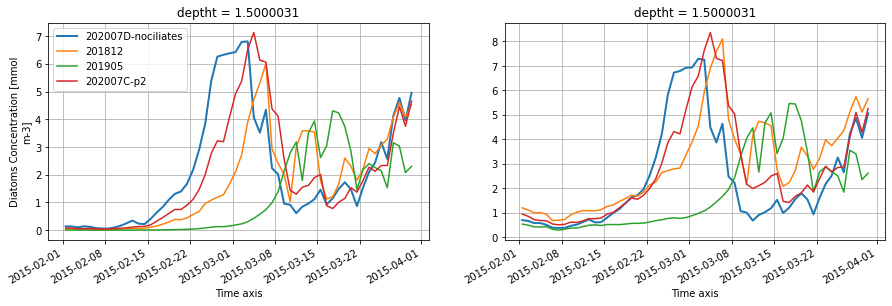

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
timeseries2015.diatoms.plot(ax=axs[0], linewidth=2, label='202007D-nociliates')
old2015.diatoms.plot(ax=axs[0], label='201812');
hind2015.diatoms.plot(ax=axs[0], label='201905')
prev2015.diatoms.plot(ax=axs[0], label='202007C-p2');
axs[0].grid();
axs[0].legend(loc='upper left')
(timeseries2015.diatoms+timeseries2015.flagellates+timeseries2015.ciliates).plot(ax=axs[1], linewidth=2);
(old2015.diatoms+old2015.flagellates+old2015.ciliates).plot(ax=axs[1]);
(hind2015.diatoms+hind2015.flagellates+hind2015.ciliates).plot(ax=axs[1]);
(prev2015.diatoms+prev2015.flagellates+prev2015.ciliates).plot(ax=axs[1]);
axs[1].grid();

In [25]:
df1 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20140804T234330Z_20150604T070614Z-clean.csv',
        skiprows=78, header=None,
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'))
df2 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20150604T070624Z_20160307T160206Z-clean.csv',
        skiprows=78, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC'))

/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/ocean/sallen/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [26]:
df3 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search3928586/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20160307T160215Z_20161019T064047Z-clean.csv',
                 skiprows=78, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC'))

In [27]:
df4 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv',
                 skiprows=66, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC', "Pitch (deg)", "Pitch QC Flag"  , "Roll (deg)", "Roll QC Flag"  , "True Heading (deg)", "True Heading QC Flag"))

PermissionError: [Errno 13] Permission denied: '/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv'

In [28]:
df5 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv',
                 skiprows=66, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC', "Pitch (deg)", "Pitch QC Flag"  , "Roll (deg)", "Roll QC Flag"  , "True Heading (deg)", "True Heading QC Flag"))

PermissionError: [Errno 13] Permission denied: '/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv'

In [29]:
df6 = pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv',
                 skiprows=78, header=None,
        names=('TimeUTC', 'CDOM', 'CDOMQC', 'Chlorophyll_ug', 'ChlQC', 'Turbidity_NTU', 'TurbQC', 'Lat',
               'LatQC', 'Lon', 'LongQC', "Pitch (deg)", "Pitch QC Flag"  , "Roll (deg)", "Roll QC Flag"  , "True Heading (deg)", "True Heading QC Flag"))

PermissionError: [Errno 13] Permission denied: '/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv'

In [31]:
df = pd.concat([df1.drop(df1[df1.TimeUTC<'2015'].index),
                df2.drop(df2[df2.TimeUTC>'2018'].index),
                df3.drop(df3[df3.TimeUTC>'2018'].index),
 #               df4.drop(df4[df4.TimeUTC>'2018'].index),
 #               df5.drop(df5[df5.TimeUTC>'2018'].index),
 #               df6.drop(df6[df6.TimeUTC>'2018'].index),
               ], ignore_index=True)

In [32]:
dts = [dt.datetime(int(r[0:4]),int(r[5:7]),int(r[8:10]),int(r[11:13]),int(r[14:16]),int(r[17:19])) for r in df['TimeUTC']]
df = df.assign(dts=dts)
df['Lat'] = pd.to_numeric(df['Lat'],errors='coerce')
df['Lon'] = pd.to_numeric(df['Lon'],errors='coerce')

In [33]:
llon = places.PLACES['S3']['lon lat'][0] - .01
ulon = places.PLACES['S3']['lon lat'][0] + .01
llat = places.PLACES['S3']['lon lat'][1] - .01
ulat = places.PLACES['S3']['lon lat'][1] + .01
iidfnd = (df.Lon > llon) & (df.Lon < ulon) & (df.Lat > llat) & (df.Lat < ulat)

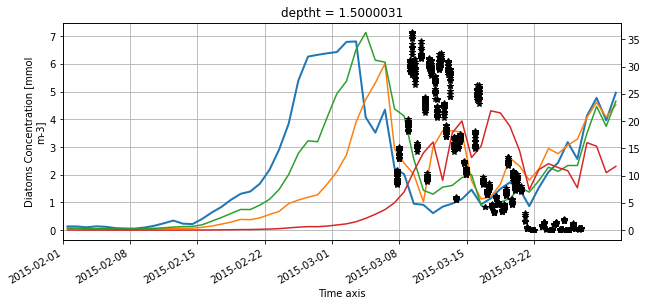

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
timeseries2015.diatoms.plot(ax=ax, linewidth=2)
old2015.diatoms.plot(ax=ax);
prev2015.diatoms.plot(ax=ax);
hind2015.diatoms.plot(ax=ax);
ax.grid()
ax2 = ax.twinx()
ax2.plot(df.loc[iidfnd, ['dts']], df.loc[iidfnd, ['Chlorophyll_ug']], 'k*')
ax.set_xlim((dt.datetime(2015, 2, 1),dt.datetime(2015, 3, 31)));

## 2016

In [44]:
directory = '202007D-again'
dir_path = Path(f"/data/sallen/results/MEOPAR/202007/{directory}")
year = 2016
months_regex = '0[34]'
file_pattern = f"SalishSea_1d_{year}{months_regex}*ptrc_T*.nc"
timeseries2016 = prep_timeseries(dir_path, file_pattern, -1)

In [45]:
timeseries2016.load(scheduler='processes', num_workers=4);

In [46]:
directory = 'nowcast-green.201812'
dir_path = Path(f"/results/SalishSea/{directory}")
month_regex = '0[34]'
file_pattern = f"*/SalishSea_1d_{year}{months_regex}*ptrc_T*.nc"
old2016 = prep_timeseries(dir_path, file_pattern, -1)

In [47]:
old2016.load(scheduler='processes', num_workers=4);

In [48]:
directory = '202007C-p2'
dir_path = Path(f"/data/sallen/results/MEOPAR/202007/{directory}")
file_pattern = f"SalishSea_1d_*ptrc_T*{year}{months_regex}??.nc"
prev2016 = prep_timeseries(dir_path, file_pattern, -1)

In [49]:
prev2016.load(scheduler='processes', num_workers=4)

<xarray.Dataset>
Dimensions:                       (nvertex: 4, time_counter: 60)
Coordinates:
    deptht                        float32 1.5
  * time_counter                  (time_counter) datetime64[ns] 2016-03-01T12...
Dimensions without coordinates: nvertex
Data variables:
    bounds_nav_lon                (time_counter, nvertex) float32 -123.6 ... ...
    bounds_nav_lat                (time_counter, nvertex) float32 49.12 ... 4...
    nitrate                       (time_counter) float32 18.3 20.66 ... 1.568
    ammonium                      (time_counter) float32 0.9796 0.9659 ... 0.872
    silicon                       (time_counter) float32 39.48 41.61 ... 0.601
    diatoms                       (time_counter) float32 1.598 0.8559 ... 0.7551
    flagellates                   (time_counter) float32 0.2932 ... 0.1655
    ciliates                      (time_counter) float32 0.395 0.2803 ... 1.097
    microzooplankton              (time_counter) float32 0.5876 ... 0.8133
    dissolved_organic_nitrogen    (time_counter) float32 0.9424 0.688 ... 2.915
    particulate_organic_nitrogen  (time_counter) float32 0.1513 0.157 ... 0.1426
    biogenic_silicon              (time_counter) float32 0.1799 0.141 ... 0.123
    mesozooplankton               (time_counter) float32 0.9562 0.6495 ... 1.096
Attributes:
    name:         SalishSea_1d_20160101_20161231_ptrc_T
    description:  biogeochemical variables
    title:        biogeochemical variables
    Conventions:  CF-1.6
    timeStamp:    2021-Jan-16 13:51:34 GMT
    uuid:         7166f434-b463-4bff-aabc-d9cb21c0093c

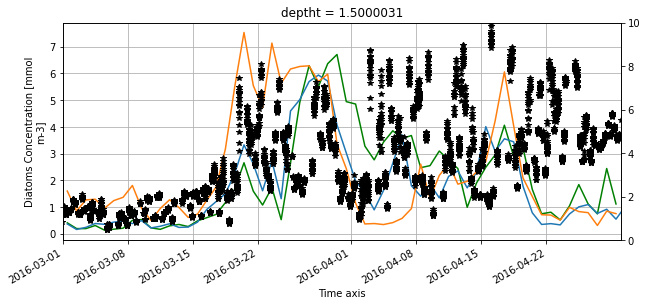

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.grid()
ax2 = ax.twinx()
ax2.plot(df.loc[iidfnd, ['dts']], df.loc[iidfnd, ['Chlorophyll_ug']], 'k*')
ax2.set_ylim(0, 10)
timeseries2016.diatoms.plot(ax=ax, color='g')
old2016.diatoms.plot(ax=ax);
prev2016.diatoms.plot(ax=ax);
ax.set_xlim((dt.datetime(2016, 3, 1),dt.datetime(2016, 4, 30)));

## 2017

In [65]:
directory = '202007D-again'
dir_path = Path(f"/data/sallen/results/MEOPAR/202007/{directory}")
year = 2017
months_regex = '0[34]'
file_pattern = f"SalishSea_1d_{year}{months_regex}*ptrc_T*.nc"
timeseries2017 = prep_timeseries(dir_path, file_pattern, -1)

In [66]:
timeseries2017.load(scheduler='processes', num_workers=4);

In [69]:
directory = '202007C-p2'
dir_path = Path(f"/data/sallen/results/MEOPAR/202007/{directory}")
year = 2017
months_regex = '0[34]'
file_pattern = f"SalishSea_1d_*ptrc_T*{year}{months_regex}??.nc"
nobenth2017 = prep_timeseries(dir_path, file_pattern, -1)

In [ ]:
nobenth2017.load(scheduler='processes', num_workers=4);

In [70]:
directory = 'nowcast-green.201812'
dir_path = Path(f"/results/SalishSea/{directory}")
month_regex = '0[34]'
file_pattern = f"*/SalishSea_1d_{year}{months_regex}*ptrc_T*.nc"
old2017 = prep_timeseries(dir_path, file_pattern, -1)

In [61]:
old2017.load(scheduler='processes', num_workers=4);

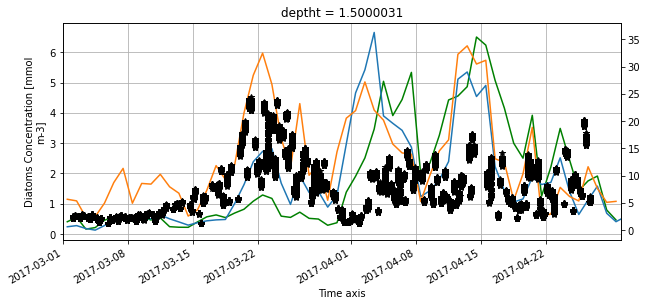

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
timeseries2017.diatoms.plot(ax=ax, color='g')
old2017.diatoms.plot(ax=ax);
nobenth2017.diatoms.plot(ax=ax)
ax.grid()
ax2 = ax.twinx()
ax2.plot(df.loc[iidfnd, ['dts']], df.loc[iidfnd, ['Chlorophyll_ug']], 'k*')
ax.set_xlim((dt.datetime(2017, 3, 1),dt.datetime(2017, 4, 30)));